# The First Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook your are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution. *Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. However, feel free to compute additional results and vizualizations to motivate the decisions you need to make, for example with respect to modification, simplification or sampling of the data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Yasmin Abdalla Farag Elsawy (403331)
    2. Ahmed Mohamed Abdelrahman Eldesouki (403377)
    3. David Abdelmalek (403216)

## Preprocessing of the Dataset (5 points)
 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'population_density' dataset by random sampling.
     - Use one of the group member's student number as a seed.
 - Add another column to the dataset:
     - Name it 'population_density_categorical'.
     - The values in this column depend on values in 'population_density' column and will be defined as follows:
        - 5824=<population density              corresponding value in 'population_density_categorical' column: 'very high'
        - 4368=<population density<5824         corresponding value in 'population_density_categorical' column: 'high'
        - 2912=<population density<4368         corresponding value in 'population_density_categorical' column: 'medium'
        - 1456=<population density<2912         corresponding value in 'population_density_categorical' column: 'low' 
        - population density<1456               corresponding value in 'population_density_categorical' column: 'very low'
 - After completing this preprocessing step, export your final dataset as 'population_density_categorical.csv' dataset and use that for next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset (without any cleaning).
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [0]:
import random as rnd
import pandas as pd 

import numpy as np
                 
                 
filename = "population_density.csv"
number_of_rows = sum(1 for line in open(filename)) - 1
number_of_sample=round(number_of_rows*0.9) #desired sample size

rnd.seed(403377)
skip = sorted(rnd.sample(range(1,number_of_rows+1),number_of_rows-number_of_sample)) #the 0-indexed header will not be included in the skip list

pop_dens = pd.read_csv(filename, sep=',', error_bad_lines=False, index_col=False, dtype='unicode',skiprows=skip) #uncomment when deliver
#pop_dens = pd.read_csv(io.BytesIO(uploaded['population_density.csv']), sep=',', error_bad_lines=False, index_col=False, dtype='unicode',skiprows=skip) #for colab use only
pop_dens.loc[:,'population_density'] = pd.to_numeric(pop_dens['population_density'])
pop_dens.loc[:,'temperature'] = pd.to_numeric(pop_dens['temperature'])
bins =[-1, 1455, 2911, 4367, 5823, np.inf]
names = ['very low', 'low', 'medium', 'high', 'very high']
pop_dens['population_density_categorical'] = pd.cut(pop_dens.population_density, bins, labels=names)

In [0]:
pop_dens.to_csv("population_density_categorical.csv",index=False)

## Question 1 - Insights into the Data (20 points):

### Dealing with Outliers (10 points)
   (a) Use a boxplot to find and remove the outliers from "temperature". Note that based on the boxplot the values greater than upper-whisker and less than lower-whisker are considered as the outliers. Now you should  have two datasets (cleaned and original).

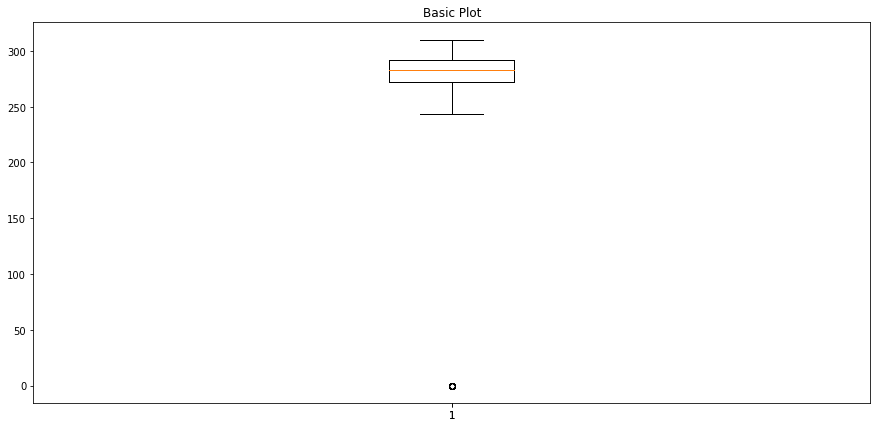

In [14]:
# Your code:
import matplotlib.pyplot as plt

population_density_categorical = pd.read_csv("population_density_categorical.csv")
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.set_title('Basic Plot')
ax1.boxplot(population_density_categorical['temperature'])

temp_boxplot=plt.boxplot(population_density_categorical['temperature'])

x=[item.get_ydata() for item in temp_boxplot['whiskers']]

lower_whisker=x[0][1]
upper_whisker=x[1][1]
outliers_query='temperature >='+str(lower_whisker)+' and  temperature <='+str(upper_whisker)
population_density_categorical_no_outliers = population_density_categorical.query(outliers_query)


Text(0.5, 1.0, 'Cleaned Dataset')

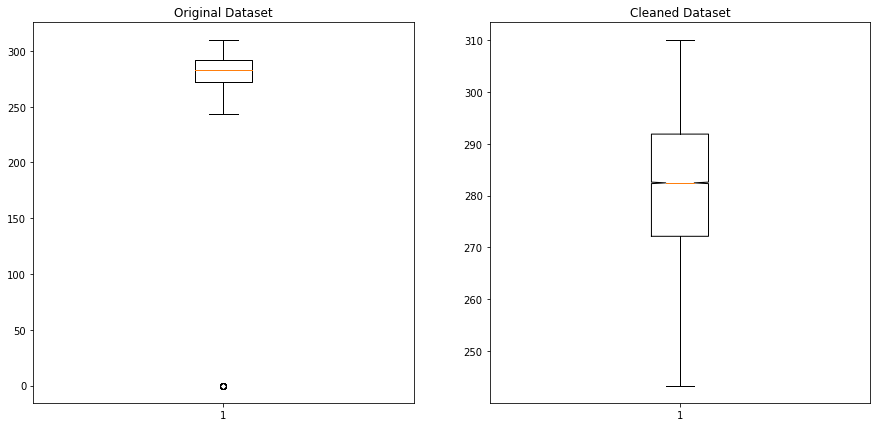

In [15]:
fig, axs = plt.subplots(1, 2,figsize=(15,7))
# basic plot
axs[0].boxplot(population_density_categorical['temperature'])
axs[0].set_title('Original Dataset')

# notched plot
axs[1].boxplot(population_density_categorical_no_outliers['temperature'], 1)
axs[1].set_title('Cleaned Dataset')

   (b) Compare basic statistical features of "temperature" (median, mean, and mode) in the cleaned and original datasets.    Interpret the differences for these statistical values between the cleaned and original datasets. 

{'median original': 282.45, 'median cleaned dataset': 282.45, 'mean original': 281.22235939516065, 'mean cleaned dataset': 281.2742263002501, 'mode original': 274.15, 'mode cleaned dataset': 274.15}


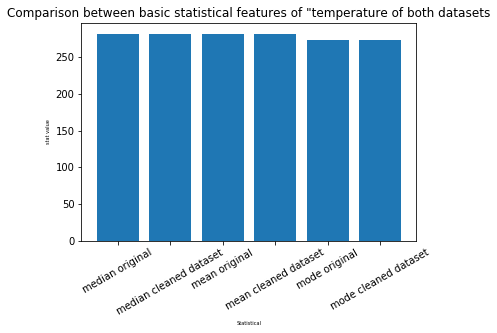

In [16]:
# Your code:

import statistics as stats
import numpy as np 

original_data_temp_stats = population_density_categorical["temperature"].describe()
processed_data_temp_stats = population_density_categorical_no_outliers["temperature"].describe()

histogram_data = {"median original":stats.median(population_density_categorical["temperature"]),
              "median cleaned dataset":stats.median(population_density_categorical_no_outliers["temperature"]),
              "mean original":original_data_temp_stats["mean"],
              "mean cleaned dataset":processed_data_temp_stats["mean"],
              "mode original":stats.mode(population_density_categorical["temperature"]),
              "mode cleaned dataset":stats.mode(population_density_categorical_no_outliers["temperature"])}

value_histogram = list(histogram_data.values())
labels_histo = list(histogram_data.keys())

labels_int =np.arange(len(labels_histo))
print(histogram_data)
plt.bar(labels_int, value_histogram)
plt.xlabel('Statistical', fontsize=5)
plt.ylabel('stat value', fontsize=5)
plt.xticks(labels_int, labels_histo, fontsize=10, rotation=30)
plt.title('Comparison between basic statistical features of "temperature of both datasets')
plt.show()



The above histogram compares the mean, median and mode between the original dataset (name: population_density_categorical) and the cleaned dataset (population_density_categorical_no_outliers) where the outliers, a total of 8 data records, were removed.
From the above graph we observe that the only slight change occured in "mean" while the other statistical features "median" "mode" had no change. as this slight change been influenced by the 8 removed outliers which mean that the denominator decreased for the cleaned dataset. 

   (c) Compare the number of data rows before and after removing the outliers. How many data rows are removed by removing    outliers?

In [17]:
number_of_removed_rows = len(population_density_categorical.index) - len(population_density_categorical_no_outliers.index)
print('number of removed rows is: '+str(number_of_removed_rows))

number of removed rows is: 8


### Basic Visualization (10 points)
   (d) Visualize mean and median of "population_density" for non-'None' "holiday" values in the original dataset. Specify    the "holiday" values for which the mean of "population_density" is maximal and for which it is minimal.

In [0]:
def barPlot(y_values,x_labels,ytitle,xtitle,title):
    val_histo = list(y_values)
    labels_int =np.arange(len(x_labels))
    
    print(histo_data)
    plt.bar(labels_int, val_histo)
    plt.xlabel(xtitle, fontsize=5)
    plt.ylabel(ytitle, fontsize=5)
    plt.xticks(labels_int, x_labels, fontsize=10, rotation=30)
    plt.title(title)
    plt.show()
    

In [19]:
population_density_categorical_unique = population_density_categorical.holiday.unique()

population_density_categorical_non_None = population_density_categorical.drop(population_density_categorical.loc[population_density_categorical['holiday']== 'None'].index)
mean = population_density_categorical_non_None.groupby(['holiday']).mean()
median = population_density_categorical_non_None.groupby(['holiday']).median()


,temperature,rain_1h,snow_1h,clouds_percentage,population_density
holiday,,,,,
Christmas Day,267.295000,0.041667,0.0,70.833333,827.500000
Columbus Day,284.360333,0.000000,0.0,0.333333,531.000000
Independence Day,292.038000,0.000000,0.0,1.000000,1076.000000
Labor Day,292.934286,0.505714,0.0,39.000000,1013.142857
Martin Luther King Jr Day,265.261667,0.000000,0.0,56.000000,612.666667
Memorial Day,292.136750,0.000000,0.0,38.750000,1000.000000
New Years Day,263.160000,0.000000,0.0,90.000000,1304.750000
State Fair,290.984000,0.000000,0.0,21.000000,634.800000
Thanksgiving Day,274.583333,0.000000,0.0,56.666667,933.500000


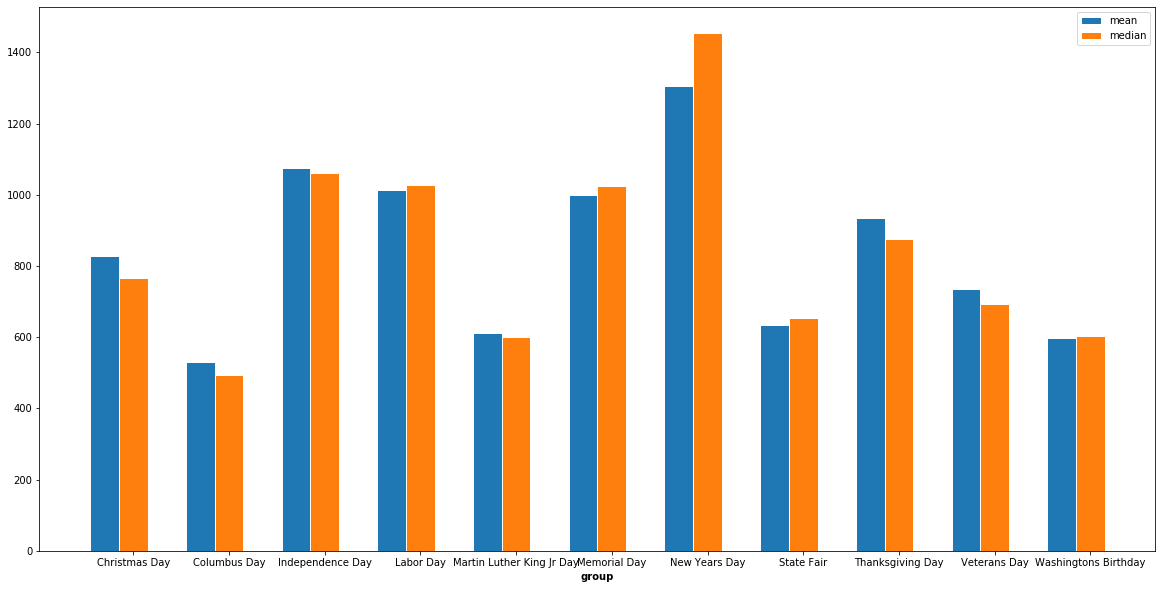

In [20]:
#import matplotlib.pyplot as plt

#plt.bar(mean["population_density"])
#ax = mean["population_density"].plot(kind='bar', title ="Comparing Means for Holidays", figsize=(15, 5), legend=True, fontsize=12)
#ax.set_xlabel("Holidays", fontsize=12)
#ax.set_ylabel("Population Density", fontsize=12)
#plt.show()

barWidth = 0.30
 
# set height of bar
bars1 = mean["population_density"]
bars2 = median["population_density"]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(20,10))

# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='var2')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], list(mean.index))


# Create legend & Show graphic
leg = plt.legend()
leg.get_texts()[0].set_text("mean")
leg.get_texts()[1].set_text("median")

plt.show()



   (e) Plot the distribution of "temperature" in the original and cleaned datasets.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdae812fc88>]],
      dtype=object)

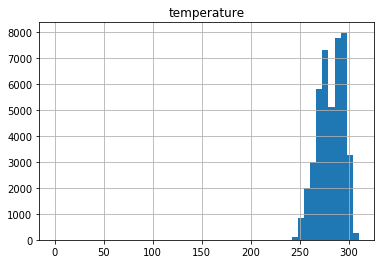

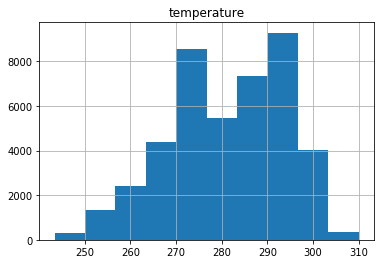

In [21]:
# Your code:


population_density_categorical.hist(column="temperature", bins=50 )
population_density_categorical_no_outliers.hist(column="temperature")

   (f) Explore the distribution of "population_density" and "temperature" together in the cleaned dataset. Specify the ranges of "temperature" and "population_density" for which the frequency of the data is the highest.

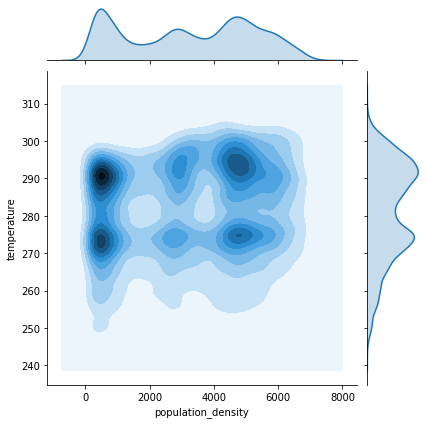

In [27]:
# Your code:
import seaborn as sns


sns.jointplot(x="population_density", y="temperature", data=population_density_categorical_no_outliers.loc[:,["population_density","temperature"]], kind="kde");

<b> Explanation: </b> According to the graph above we can notice that the highest Density is the darkest spots which the ranges are on average [Temp]/[Dens] [285-295 , 275] / [500]

## Question 2 - Decision Trees (15 points):

   (a) Add a categorical temperature column to the cleaned dataset based on the following rules and name it                "temperature_categorical":
        - temperature >= upper_quartile (third quartile) corresponding value in 'temperature_categorical' column: 'high'
        - temperature <= lower_quartile (first quartile) corresponding value in 'temperature_categorical' column: 'low'
        - lower_quartile < temperature < upper_quartile corresponding value in 'temperature_categorical' column: 'medium'

In [2]:
import pandas as pd 
population_density_categorical_no_outliers_decision_tree = pd.read_csv("population_density_categorical.csv")
quartiles = population_density_categorical_no_outliers_decision_tree.loc[:,'temperature'].quantile([0.25,0.75])

quartiles = list(quartiles)

min_temperature = population_density_categorical_no_outliers_decision_tree["temperature"].min()
max_temperature = population_density_categorical_no_outliers_decision_tree["temperature"].max()

ranges = [min_temperature-0.01,quartiles[0],quartiles[1]-0.01,max_temperature]

population_density_categorical_no_outliers_decision_tree['temperature_categorical']=pd.cut(population_density_categorical_no_outliers_decision_tree['temperature'],ranges,labels=["low", "medium", "high"],include_lowest=True)


   (b) In the new dataset (created in Section 'a'), consider "holiday", "temperature_categorical", and "weather_type" as    the descriptive features and "population_density_categorical" as the target feature. Set the minimum number of samples  for splitting to 5000 and make a decision tree based on entropy.

In [3]:
# Your code:
from p_decision_tree.DecisionTree import DecisionTree


descriptive_features = ["holiday","temperature_categorical","weather_type"]
target_feature = "population_density_categorical"

print(target_feature)
for col in descriptive_features:
    population_density_categorical_no_outliers_decision_tree.loc[:,col] = population_density_categorical_no_outliers_decision_tree.loc[:,col].astype(str)

data_descriptive = population_density_categorical_no_outliers_decision_tree.loc[:,descriptive_features].values
data_target = population_density_categorical_no_outliers_decision_tree.loc[:,target_feature].values





population_density_categorical


In [4]:
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features, data_target.tolist(),"entropy")

decisionTree.id3(0,5000)

print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))

#Visualizing decision tree by Graphviz
dot = decisionTree.print_visualTree(render=True )

#display(dot)
 

System entropy:  2.2300834110898755
System gini:  None


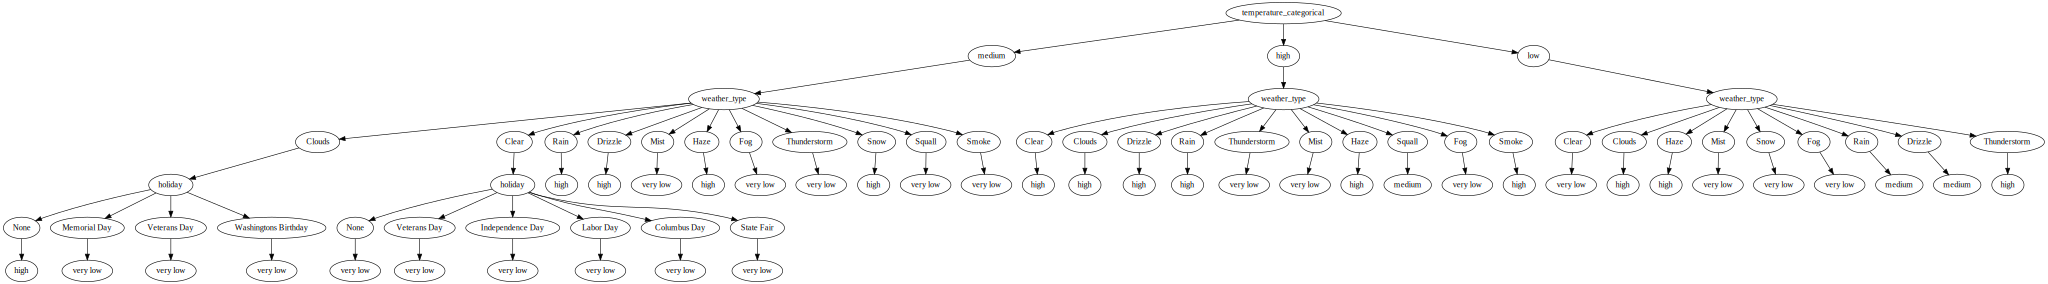

In [5]:
display(dot)

In [6]:
sampleIds = [x for x in range(len(decisionTree.sample))]
attributeIds = [x for x in range(len(decisionTree.attributes))]
print(len(sampleIds))
print(attributeIds)
print(decisionTree)

43384
[0, 1, 2]


   (c) What is the best attribute (based on entropy) for splitting the tree in the second round of ID3?  

Explanation:
The best attribute is weather type.  
As the information gain for the weather type attribute was the highest in the second iteration in comparison to the other attributes information gain. Entropy was used to measure the information gain, this measure gives us insight about the impurity found in a set of records. Thus the entropy of the set of records after the first interation will low if those set of records were divided using the weather type attribute, as a result the information gain will be highest.


## Question 3 - Regression (10 points):

For this question (Q3), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density*. Drop the information on the date for *date_time* and restrict the data to time values (hour) only.

We define *population_density* to be our target feature, while all other features are considered descriptive.

In [31]:
# PreProcess Data for Regression Task

def hr_func(ts):
    return ts.hour

population_density_categorical_reg = population_density_categorical[['holiday','temperature', 'rain_1h','snow_1h'
                                                                     ,'clouds_percentage','date_time','population_density'
                                                                    ]].copy()

population_density_categorical_reg['datetime_col'] = pd.to_datetime(population_density_categorical_reg.date_time)
population_density_categorical_reg['date_time'] = population_density_categorical_reg['datetime_col'].apply(hr_func)
population_density_categorical_reg = population_density_categorical_reg[['holiday','temperature','rain_1h','snow_1h'
                                                                         ,'clouds_percentage','date_time','population_density']]
population_density_categorical_reg.head()


,holiday,temperature,rain_1h,snow_1h,clouds_percentage,date_time,population_density
0,None,288.28,0.0,0.0,40,9,5545
1,None,289.36,0.0,0.0,75,10,4516
2,None,289.58,0.0,0.0,90,11,4767
3,None,290.13,0.0,0.0,90,12,5026
4,None,291.72,0.0,0.0,1,14,5181


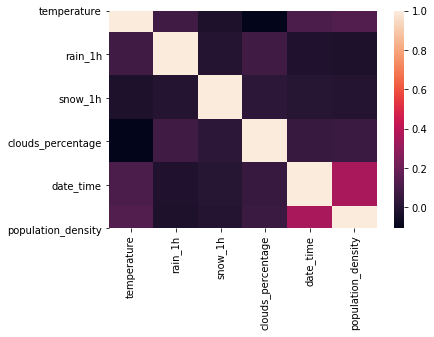

In [32]:
import statsmodels.api as sm

#Target_Feature

sns.heatmap(population_density_categorical_reg.corr())


In [33]:
population_density_categorical_reg.corr()

,temperature,rain_1h,snow_1h,clouds_percentage,date_time,population_density
temperature,1.000000,0.084294,-0.020063,-0.104588,0.113305,0.131890
rain_1h,0.084294,1.000000,0.001937,0.082327,-0.011505,-0.022076
snow_1h,-0.020063,0.001937,1.000000,0.028213,0.011294,0.000824
clouds_percentage,-0.104588,0.082327,0.028213,1.000000,0.055334,0.067611
date_time,0.113305,-0.011505,0.011294,0.055334,1.000000,0.354846
population_density,0.131890,-0.022076,0.000824,0.067611,0.354846,1.000000


   (a) Which features are suitable as an input for linear regression and which need to be modified first? Why?

<b>Explanation:</b> All Features are suitable to be an input for the linear regression model, Except for the "Holiday" column as it is a Categorical feature that first needs to be converted to numerical, because the linear regression model accepts only numerical values.


   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows.

<b>Explanation:</b> For the Holiday Feature we will apply One Hot Encoding Technique, so it would be suitable for regression calculation, however it will be expesive processing because one feature will be dealt as twelve featrues.


In [34]:
# Your code:
population_density_categorical_reg = pd.get_dummies(population_density_categorical_reg, columns = ["holiday"])
population_density_categorical_reg = population_density_categorical_reg[['temperature', 'rain_1h', 'snow_1h', 'clouds_percentage', 'date_time',
        'holiday_Christmas Day', 'holiday_Columbus Day',
       'holiday_Independence Day', 'holiday_Labor Day',
       'holiday_Martin Luther King Jr Day', 'holiday_Memorial Day',
       'holiday_New Years Day', 'holiday_None', 'holiday_State Fair',
       'holiday_Thanksgiving Day', 'holiday_Veterans Day',
       'holiday_Washingtons Birthday','population_density']]
population_density_categorical_reg.head(2)

,temperature,rain_1h,snow_1h,clouds_percentage,date_time,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,population_density
0,288.28,0.0,0.0,40,9,0,0,0,0,0,0,0,1,0,0,0,0,5545
1,289.36,0.0,0.0,75,10,0,0,0,0,0,0,0,1,0,0,0,0,4516


(c) To get a first idea about our data, plot the behaviour of the target feature (population_density) over time (date_time).

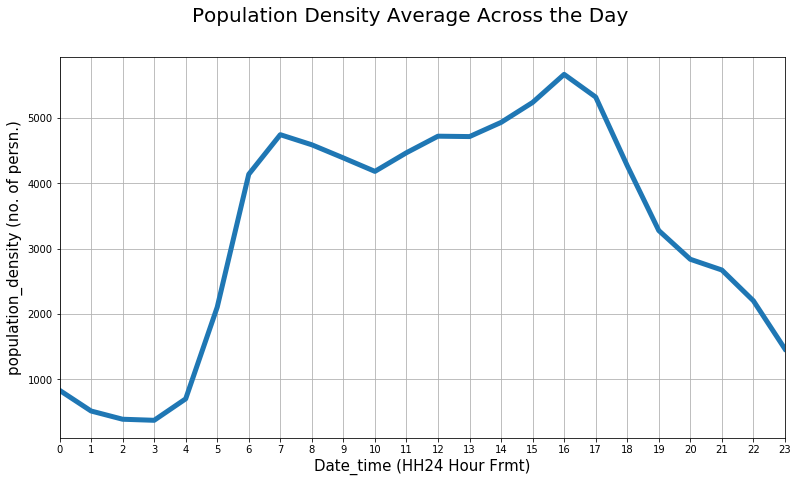

In [35]:
x_hours=population_density_categorical_reg.date_time.unique()
fig, ax = plt.subplots(figsize=(13,7))
population_density_categorical_reg.groupby(['date_time']).mean()['population_density'].plot(ax=ax,linewidth=5)
ax.set_xlabel('Date_time (HH24 Hour Frmt)',size=15)
ax.set_ylabel('population_density (no. of persn.)',size=15)
fig.suptitle('Population Density Average Across the Day', fontsize=20)
plt.xticks(x_hours)
plt.grid(True)

<b>Graph Explanation : </b> from the graph above we can notice the population density is at its highest levels during peak hours, on the other hand it decline in the evening and reaching its lowest levels after midnight.

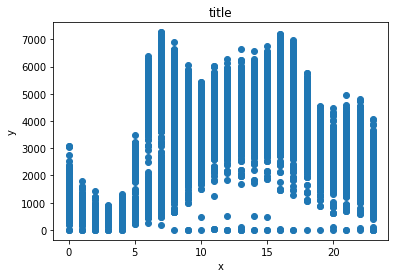

In [36]:
#visualize data points
plt.scatter(population_density_categorical_reg[['date_time']], population_density_categorical_reg[['population_density']])  
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('title')
plt.show()

   (d) Create two distinct subsets of the data. Use sampling methods as described in the lecture. You should end up with two DIFFERENT sample data sets *RegA, RegB*. Include these data sets in the submitted data set zip file. 
   
   Which sampling methods did you choose and why? Which one do you expect to result in a better classifier?

In [38]:
RegA = population_density_categorical_reg.head(100) #Top Sampling
RegB = population_density_categorical_reg.sample(n=100,random_state=403377) #Random Sampling

RegA.to_csv("RegA.csv",index=False)
RegB.to_csv("RegB.csv",index=False)

#train, test = train_test_split(Descriptive_Variables,stratify=x_hours)

#test.shape
RegA.head()

,temperature,rain_1h,snow_1h,clouds_percentage,date_time,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,population_density
0,288.28,0.0,0.0,40,9,0,0,0,0,0,0,0,1,0,0,0,0,5545
1,289.36,0.0,0.0,75,10,0,0,0,0,0,0,0,1,0,0,0,0,4516
2,289.58,0.0,0.0,90,11,0,0,0,0,0,0,0,1,0,0,0,0,4767
3,290.13,0.0,0.0,90,12,0,0,0,0,0,0,0,1,0,0,0,0,5026
4,291.72,0.0,0.0,1,14,0,0,0,0,0,0,0,1,0,0,0,0,5181


<b>Explanation:</b> We chose "Top Sampling" & "Random Sampling", expect random sampling to result in better classification, as it will not be biased by the data ordering in the csv file provided.


   (e) Train a linear regression classifier based on each of the two sample data sets *RegA, RegB* created before.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

RegA_classifier = LinearRegression(normalize=True)
RegB_classifier = LinearRegression(normalize=True)

RegA_Descriptive_Variables = RegA.iloc[:,:-1].values
RegA_Target_Feature = RegA.iloc[:,17].values

RegB_Descriptive_Variables = RegB.iloc[:,:-1].values
RegB_Target_Feature = RegB.iloc[:,17].values

RegA_classifier.fit(RegA_Descriptive_Variables,RegA_Target_Feature)
RegB_classifier.fit(RegB_Descriptive_Variables,RegB_Target_Feature)

RegA_y_predict = RegA_classifier.predict(RegA_Descriptive_Variables)
RegB_y_predict = RegB_classifier.predict(RegB_Descriptive_Variables)

(f) Visualize both computed regression functions in one plot each, combined with the original data set. For example, you can show a plot similar to 3(c) and insert the regression functions result.

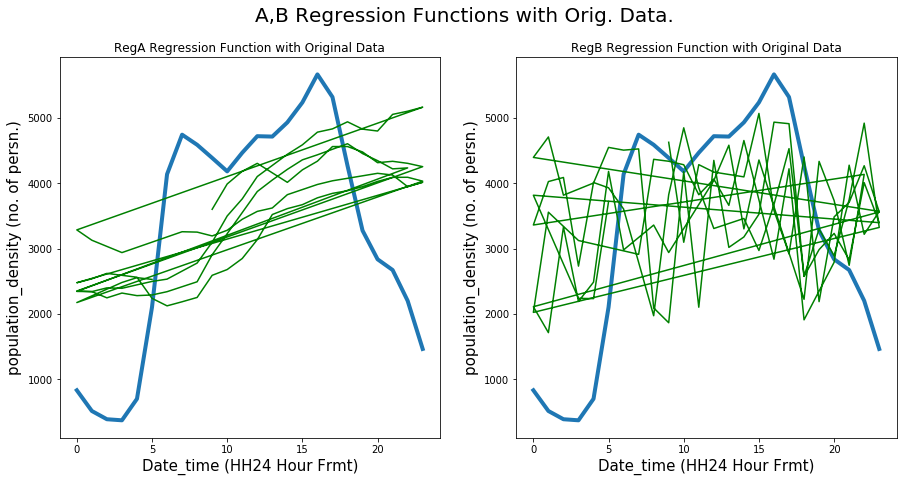

In [40]:
# Your code:
x_hours=population_density_categorical_reg.date_time.unique()
fig, ax = plt.subplots(1,2,figsize=(15,7))
fig.suptitle('A,B Regression Functions with Orig. Data.', fontsize=20)
ax[0].set_xlabel('Date_time (HH24 Hour Frmt)',size=15)
ax[0].set_ylabel('population_density (no. of persn.)',size=15)
ax[1].set_xlabel('Date_time (HH24 Hour Frmt)',size=15)
ax[1].set_ylabel('population_density (no. of persn.)',size=15)
ax[0].set_title('RegA Regression Function with Original Data')
ax[1].set_title('RegB Regression Function with Original Data')
ax[0].plot(population_density_categorical_reg.groupby(['date_time']).mean()['population_density'],linewidth=4) 
ax[1].plot(population_density_categorical_reg.groupby(['date_time']).mean()['population_density'],linewidth=4) 
ax[0].plot(RegA[['date_time']], RegA_y_predict, color = "g") 
ax[1].plot(RegA[['date_time']], RegB_y_predict, color = "g") 

   (g) For each of the two resulting models compute and print the mean squared error, mean absolute error and median squared error with respect to the original, non-sampled data set. Also, present plots showing the errors and squared errors.

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,median_absolute_error

Original_Descriptive_Variables = population_density_categorical_reg.iloc[:,:-1].values
Original_Target_Feature = population_density_categorical_reg.iloc[:,17].values

RegA_y_predict_original = RegA_classifier.predict(Original_Descriptive_Variables)
RegB_y_predict_original = RegB_classifier.predict(Original_Descriptive_Variables)

print("Reg A Mean squared error: "+ str(mean_squared_error(Original_Target_Feature, RegA_y_predict_original)))
print("Reg B Mean squared error: "+ str(mean_squared_error(Original_Target_Feature, RegB_y_predict_original)))
print('--------')
print("Reg A Mean absolute error: "+ str(mean_absolute_error(Original_Target_Feature, RegA_y_predict_original)))
print("Reg B Mean absolute error: "+ str(mean_absolute_error(Original_Target_Feature, RegB_y_predict_original)))
print('--------')
print("Reg A median absolute error: "+ str(median_absolute_error(Original_Target_Feature, RegA_y_predict_original)))
print("Reg B median absolute error: "+ str(median_absolute_error(Original_Target_Feature, RegB_y_predict_original)))

Reg A Mean squared error: 4064391.230635206
Reg B Mean squared error: 3596753.3240336566
--------
Reg A Mean absolute error: 1689.1975940520674
Reg B Mean absolute error: 1642.3288870454055
--------
Reg A median absolute error: 1605.4557509324914
Reg B median absolute error: 1593.6747997636376


Text(0, 0.5, 'squared error')

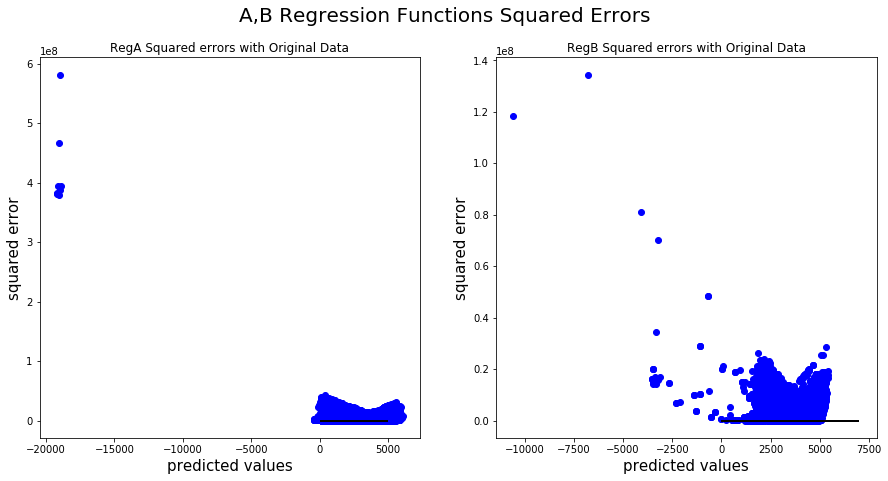

In [42]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
fig.suptitle('A,B Regression Functions Squared Errors', fontsize=20)

## plotting both models squared Errors 
ax[0].scatter(RegA_y_predict_original, (Original_Target_Feature - RegA_y_predict_original) ** 2, color = "blue")
ax[1].scatter(RegB_y_predict_original, (Original_Target_Feature - RegB_y_predict_original) ** 2, color = "blue")
ax[0].set_title('RegA Squared errors with Original Data')
ax[1].set_title('RegB Squared errors with Original Data')

## plotting line for zero error 
ax[0].hlines(y = 0, xmin = 0, xmax = 5000, linewidth = 2) 
ax[1].hlines(y = 0, xmin = 0, xmax = 7000, linewidth = 2) 

ax[0].set_xlabel('predicted values',size=15)
ax[0].set_ylabel('squared error',size=15)
ax[1].set_xlabel('predicted values',size=15)
ax[1].set_ylabel('squared error',size=15)


Text(0, 0.5, 'absolute error')

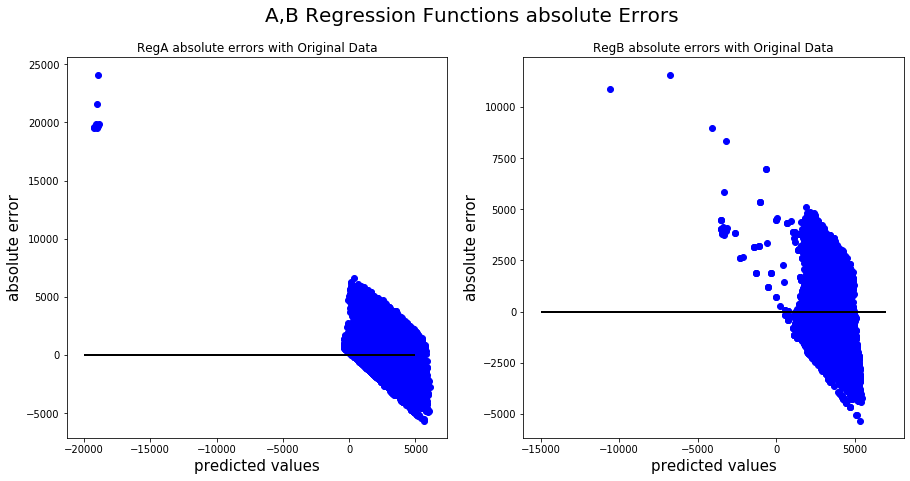

In [43]:
#plot
fig, ax = plt.subplots(1,2,figsize=(15,7))
fig.suptitle('A,B Regression Functions absolute Errors', fontsize=20)

## plotting both models squared Errors 
ax[0].scatter(RegA_y_predict_original, (Original_Target_Feature - RegA_y_predict_original), color = "blue")
ax[1].scatter(RegB_y_predict_original, (Original_Target_Feature - RegB_y_predict_original), color = "blue")
ax[0].set_title('RegA absolute errors with Original Data')
ax[1].set_title('RegB absolute errors with Original Data')

## plotting line for zero error 
ax[0].hlines(y = 0, xmin = -20000, xmax = 5000, linewidth = 2) 
ax[1].hlines(y = 0, xmin = -15000, xmax = 7000, linewidth = 2) 

ax[0].set_xlabel('predicted values',size=15)
ax[0].set_ylabel('absolute error',size=15)
ax[1].set_xlabel('predicted values',size=15)
ax[1].set_ylabel('absolute error',size=15)


   (h) Interpret and evaluate the two models and compare them. Why are they similar/different? Which model do you recommend and why? How do you think the applied methods could be improved to get better results?

<b>Explanation: </b> <br> <b>*Interpretation*</b> the two Regression models depends on different Training set of sample size=100, as the RegA is a biased model due to its sampling technique that depends on records ordering of the file, and that elaborates why it has much higher error rate. on the other hand RegB that was Random sample had much variety of the data and more representative that RegA, and that also elaborates why it has lower error rate.
<br><b>Recommended Model</b> we would recommend RegB Model as it has more representation of the data.
<br><b>Better Results</b>
<br><b>1</b>- Include More Significant Features(weather Type).
<br><b>2</b>- Derive New Features and use it, ex: Season to be derived out of date_time to get months then seasons.
<br>Weekend or Weekday Attribute, can also be derived of Date_time.
<br><b>3</b>- binning&then coding of (Hours) to be (early morning/morning/afternoon/evenning).
<br><b>4</b>- Increase Sample Size.
<br><b>5</b>- Normalize data, such as Temprature.



## Question 4 - Support Vector Machines (10 points):

For this question (Q4), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density_categorical*. For *date_time*, drop the information on the date and restrict the data to time values only.
We define *population_density_categorical* to be our target feature, while all other features are considered descriptive.


In [1]:
# PreProcess Data for SVM Task
import pandas as pd 
population_density_categorical_SVM = pd.read_csv("population_density_categorical.csv",usecols=['holiday','temperature','rain_1h','snow_1h','clouds_percentage','date_time','population_density_categorical'])

In [2]:
def hr_func(ts):
    return ts.hour

#pd.read_csv("population_density_categorical.csv",usecols=['holiday','temperature','rain_1h','snow_1h','clouds_percentage','date_time','population_density_categorical'])

population_density_categorical_SVM['datetime_col'] = pd.to_datetime(population_density_categorical_SVM.date_time)
population_density_categorical_SVM['date_time'] = population_density_categorical_SVM['datetime_col'].apply(hr_func)

population_density_categorical_SVM = population_density_categorical_SVM[['holiday','temperature','rain_1h','snow_1h'
                                                                         ,'clouds_percentage','date_time','population_density_categorical']]
population_density_categorical_SVM.head()


,holiday,temperature,rain_1h,snow_1h,clouds_percentage,date_time,population_density_categorical
0,None,288.28,0.0,0.0,40,9,high
1,None,289.36,0.0,0.0,75,10,high
2,None,289.58,0.0,0.0,90,11,high
3,None,290.13,0.0,0.0,90,12,high
4,None,291.72,0.0,0.0,1,14,high


In [3]:
target_feature = population_density_categorical_SVM['population_density_categorical']
columns_SVM = population_density_categorical_SVM.columns
columns_SVM = list(columns_SVM)
columns_SVM.remove('population_density_categorical')
descriptive_features = population_density_categorical_SVM[columns_SVM]

   (a) Which features are suitable as an input for SVM and which need to be modified first? Modify the data as needed and provide a brief explanation.

In [4]:
# Your code:

holiday_one_hot = pd.get_dummies(descriptive_features['holiday'])
descriptive_features.drop('holiday', axis=1, inplace=True)
descriptive_features=descriptive_features.join(holiday_one_hot)

C:\Users\Eng.Ahmed\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [5]:
from sklearn import preprocessing
normalized_descriptive_features =  preprocessing.normalize(descriptive_features)

Explanation: For the Holiday column the data is categorical (nominal) thus we first need to perform one-hot encoding, to be able to perform SVM classification. Furthermore, we need to normalize the data in order to map the values between the range from 0 to 1 


   (b) Divide the data set into a training set *svmTrain* and a test set *svmTest* and briefly motivate your division      strategy. Include these data sets in the data set zip file you submit. 
   
   Hint: Training the SVMs will take longer for a large training set!

In [6]:
# Your code:
from sklearn.model_selection import train_test_split
svmTrain, svmTest, y_svmTrain, y_svmTest = train_test_split(descriptive_features, target_feature, test_size=0.2, stratify=target_feature)
#svmTrain_csv = pd.DataFrame(data=svmTrain.flatten())
#svmTest_csv = pd.DataFrame(data=svmTest.flatten())
svmTrain.to_csv("svmTrain.csv",index=False)
svmTest.to_csv("svmTest.csv",index=False)

Explanation: in the above sampling method we have chose stratify inorder to ensure a balanced representation for each class.


   (c) Use the training set to train 3 different SVMs with different combinations of the parameters. Use at least two distinct values for the parameters *kernel* and *C*.

In [7]:
svmTrain = svmTrain.sample(n=1000)
y_svmTrain = target_feature[svmTrain.index]

In [9]:
from sklearn.svm import SVC

#prepare input data
features = descriptive_features
X = svmTrain
y = y_svmTrain

Svmclassifier1 = SVC(C=1, kernel='linear')
Svmclassifier1.fit(X, y)

Svmclassifier2 = SVC(C=2, kernel='poly')
Svmclassifier2.fit(X, y)


Svmclassifier3 = SVC(C=1, kernel='rbf')
Svmclassifier3.fit(X, y)


C:\Users\Eng.Ahmed\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Eng.Ahmed\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

   (d) Compute and print the mean accurracy and classification report of the trained SVMs with respect to the test set (as shown in instruction).

In [10]:
from sklearn.metrics import classification_report

pred1 = Svmclassifier1.predict(svmTest)
pred2 = Svmclassifier2.predict(svmTest)
pred3 = Svmclassifier3.predict(svmTest)

print('SVM1 Accuracy: \n', Svmclassifier1.score(svmTest,pred1), '\n')
print('SVM2 Accuracy: \n', Svmclassifier2.score(svmTest,pred2), '\n')
print('SVM3 Accuracy: \n', Svmclassifier3.score(svmTest,pred3), '\n')

print('SVM1 Classification Report: \n', classification_report(y_svmTest, pred1), '\n')
print('SVM2 Classification Report: \n', classification_report(y_svmTest, pred2), '\n')
print('SVM3 Classification Report: \n', classification_report(y_svmTest, pred3), '\n')

SVM1 Accuracy: 
 1.0 

SVM2 Accuracy: 
 1.0 

SVM3 Accuracy: 
 1.0 

SVM1 Classification Report: 
               precision    recall  f1-score   support

        high       0.61      0.72      0.66      2446
         low       0.65      0.01      0.02      1357
      medium       0.32      0.53      0.40      1641
   very high       0.00      0.00      0.00       860
    very low       0.69      0.88      0.77      2373

    accuracy                           0.55      8677
   macro avg       0.45      0.43      0.37      8677
weighted avg       0.52      0.55      0.48      8677
 



C:\Users\Eng.Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVM2 Classification Report: 
               precision    recall  f1-score   support

        high       0.56      0.81      0.66      2446
         low       0.48      0.39      0.43      1357
      medium       0.48      0.38      0.43      1641
   very high       0.58      0.10      0.17       860
    very low       0.81      0.87      0.84      2373

    accuracy                           0.61      8677
   macro avg       0.58      0.51      0.51      8677
weighted avg       0.60      0.61      0.58      8677
 

SVM3 Classification Report: 
               precision    recall  f1-score   support

        high       0.56      0.74      0.64      2446
         low       0.50      0.40      0.44      1357
      medium       0.43      0.41      0.42      1641
   very high       0.42      0.14      0.21       860
    very low       0.78      0.82      0.80      2373

    accuracy                           0.59      8677
   macro avg       0.54      0.50      0.50      8677
weighted avg   

   (e) Interpret and evaluate the 3 SVMs and compare them. Why are they similar/different? Which SVM do you recommend and why?

**Explanation:** comparing the kernel types of the SVM, as are trying to map from 6 dimensional space to a higher dimensional space as we are trying to seperate the non-linear spearable data in the low dimensional space, thus the kernel type which is linear separate the data in the higher dimensional using a linear hyperplane. While kernel type 'ploynomial' which can fit polynomial hyperplane separating the data in the higher dimensional space, and from the above results we can conclude that the best kernel type which fits our data is the poly kernel as the hyperplane used to separate the classes is of degree N. we would recommend using poly as it is a generalization of the linear model.



## Question 5 - Neural Networks (20 points)
In this question consider the whole dataset that you have created in the *Preprocessing of Dataset* section. The target feature is *population_density_categorical*. 

To avoid performance problems, use the first 4000 rows of your dataset (you will need 2000 for training and 2000 for testing).

   (a) What are the possible inputs of your network?
     - Show the possible extracted features.
     - Show the number of possible patterns of inputs for the categorical data.

In [22]:
# Your code:
df_nn = population_density_categorical_no_outliers[:4000]  # select the first 4000 rows for training/testing.
df_nn.head()

,holiday,temperature,rain_1h,snow_1h,clouds_percentage,weather_type,weather_type_details,date_time,population_density,population_density_categorical
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,10/2/2012 9:00,5545,high
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,10/2/2012 10:00,4516,high
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 11:00,4767,high
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 12:00,5026,high
4,None,291.72,0.0,0.0,1,Clear,sky is clear,10/2/2012 14:00,5181,high


Explanation: Here are the reasons why we drop these below categorical data:

*   **holiday**: This is the distribution of holiday throughout the training points and if we include it in training, the network will be always biased toward `None` and we will add big feature spaces without getting the benefit we need.Even if the test data have holidays, the network couldnot recognize it as it is not trained on it.
                None                1998
                Thanksgiving Day       1
                Veterans Day           1
              
*  **Weather-Type**: I think weather_type_details will give more information with respect to clouds_percentage and temperature however for weather_type it will be vague, as for example Clouds there are multiple levels of `Clouds` that are not specified.

while the others will be features for the inputs:

1.    **date_time**: it is only reference to the time that the data is collected so it is better to split it into years and months to get some insghits if the population denisty relates to any time of the year or not while for day and hour, in my opinion, do not make any senses because they are just indicators to the time of collecting data and we need the network to be more general not specific to exact day or hour. So, we will extract months and then split it into four 4 quartiles and then do one hot encoding.

2.   **Weather-Type-details**: In order to build a robust model, we need some features that could help model in training some specific characteristics of the input. We will do use one integer encoding becuase there is such ordinal relationship exists.

3. **population_density_categorical** : Since `population_density_categorical` is an ordinal feature so we can have  integer values that have a natural ordered relationship between each other and neural network algorithms could understand and harness this relationship. 




**I will do onehot/Integer encoding in part c**





In [23]:
# Your code:

# Extracting date_time
df_nn['month'] = pd.DatetimeIndex(df_nn['date_time']).month

# drop un-needed columns
df_nn = df_nn.drop(columns=['holiday','date_time','population_density', 'weather_type'])

# map months into 4 quartiles.
# this quartiles are assumpotion, it is not an exact time
df_nn.loc[ df_nn['month'] <= 3, 'month'] = 0
df_nn.loc[(df_nn['month'] > 3) & (df_nn['month'] <= 6), 'month'] = 1
df_nn.loc[(df_nn['month'] > 6) & (df_nn['month'] <= 9), 'month'] = 2
df_nn.loc[(df_nn['month'] > 9) & (df_nn['month'] <= 12), 'month'] = 3


month_map = {0: 'Winter', 1: 'Spring', 2:'Summer',3: 'Autumn'}

# apply this map on df
df_nn['month'] = df_nn['month'].map(month_map)

df_nn.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,temperature,rain_1h,snow_1h,clouds_percentage,weather_type_details,population_density_categorical,month
0,288.28,0.0,0.0,40,scattered clouds,high,Autumn
1,289.36,0.0,0.0,75,broken clouds,high,Autumn
2,289.58,0.0,0.0,90,overcast clouds,high,Autumn
3,290.13,0.0,0.0,90,overcast clouds,high,Autumn
4,291.72,0.0,0.0,1,sky is clear,high,Autumn


   (b) Before using the Neural Network algorithm, do you think it provides an accurate result? Why? 
     - Your explanation should be supported by data.

Explanation: **No**. 


*  Because, as it is required, we need to the **FIRST** train only on 2000 training points without doing any randomized shuffle so it will not give a robust model and these training points do not sufficiently cover all the data features that are given to us as `rain_1h` and `snow_1h` as both are equal to **ZERO** and many other features not covered too. What i am trying to do is to remove all the features that will not make help the model in prediction.
*  Neraual network needs such a huge data to be trained on,however, in our problem we have only 2000 training points and these could not in anyway influence the model to be a well trained model while regarding the features, the nerual network could extract the complex relation between them but only if they are suffucient while in our case we will use only 4 features with small number of dataset.

* I try to avoid the problem of for high cardinality as the feature space can really blow up quickly and we have to fight with the curse of dimensionality. 

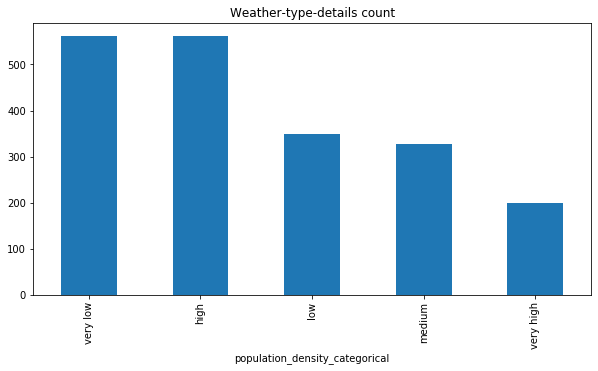

In [24]:
df_nn[:2000].groupby('population_density_categorical')['population_density_categorical'].count().sort_values(ascending=False)\
    .plot(kind='bar', figsize=(10, 5), title='Weather-type-details count')
plt.show()


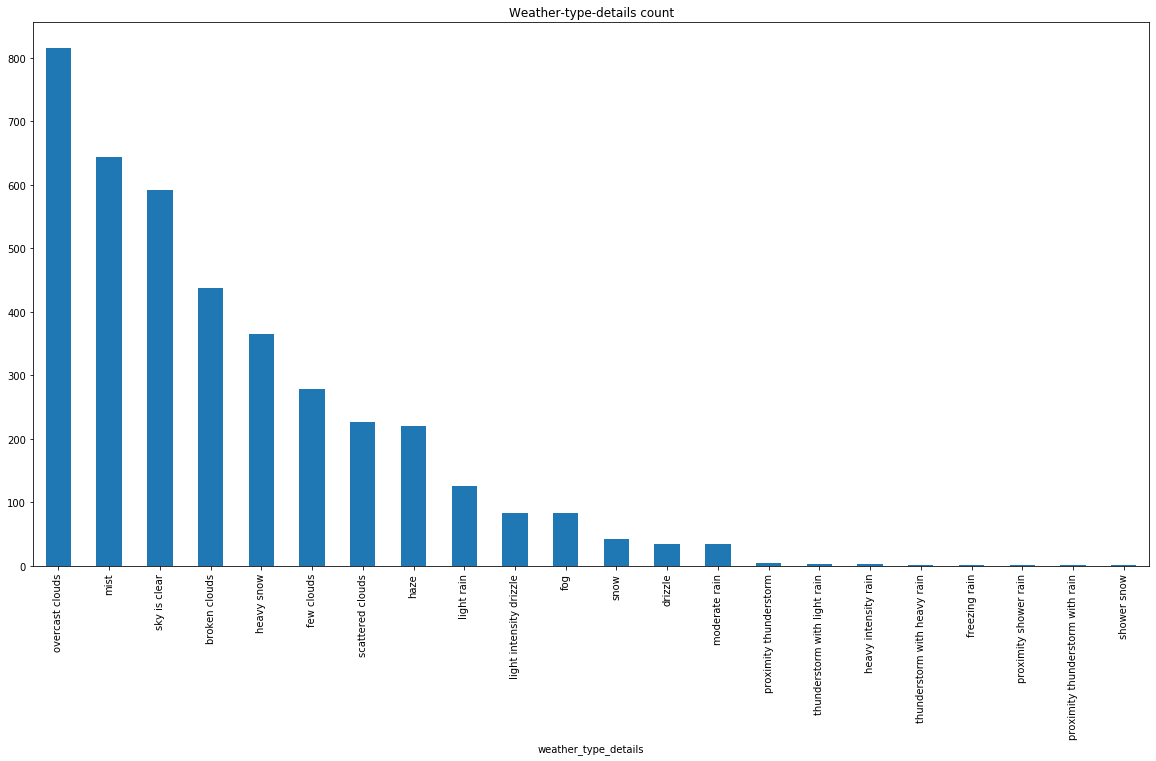

In [25]:
# Your code:
df_nn.groupby('weather_type_details')['weather_type_details'].count().sort_values(ascending=False)\
    .plot(kind='bar', figsize=(20, 10), title='Weather-type-details count')
plt.show()


* Here, there are one class that contains over 800 points and the nearest ones are around 600 and 8 of the classes far less than 100. We can easily conclude that even we have 2000 points, they don't cover all the classes in a well distributed way so the neural network will either overfit or can not classifiy well, in accuracy perspective.

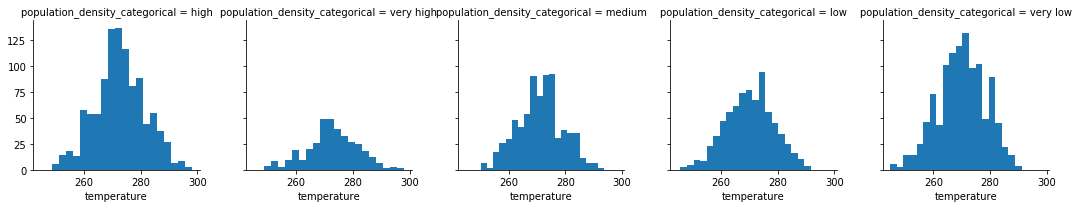

In [28]:
g = sns.FacetGrid(df_nn, col='population_density_categorical')
g.map(plt.hist, 'temperature', bins=20);

* As here, The first graph and the fourth one show that in the same temperature range, the popularity denisty could be 1 & 4 and that is contradicted result.

   (c) Which features can be used for designing your network as inputs? Why?
       - Which features should be changed (example: from categorical to numerical or numerical to categorical)? Why? 
       - Convert the features. 

Explanation:

In general, we need encoding categorical qualtative features into some numerical values because these qualtative values are mostly constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves.


> Encoding categorical features

In [29]:
# Integer Encoding for population denisty
# Create a map.
pop_density_cat_ord_map = {'very low': 1, 'low': 2, 'medium': 3, 
               'high': 4, 'very high': 5}

# apply this map on df
df_nn['population_density_categorical'] = df_nn['population_density_categorical'].map(pop_density_cat_ord_map)

df_nn.head()

,temperature,rain_1h,snow_1h,clouds_percentage,weather_type_details,population_density_categorical,month
0,288.28,0.0,0.0,40,scattered clouds,4,Autumn
1,289.36,0.0,0.0,75,broken clouds,4,Autumn
2,289.58,0.0,0.0,90,overcast clouds,4,Autumn
3,290.13,0.0,0.0,90,overcast clouds,4,Autumn
4,291.72,0.0,0.0,1,sky is clear,4,Autumn


In [30]:
# One hot encoding for months
month_encode = pd.get_dummies(df_nn['month'])
df_nn[month_encode.columns]=month_encode[month_encode.columns]
del df_nn['month'] # delete month column as it is not needed any more.
df_nn.head()

,temperature,rain_1h,snow_1h,clouds_percentage,weather_type_details,population_density_categorical,Autumn,Winter
0,288.28,0.0,0.0,40,scattered clouds,4,1,0
1,289.36,0.0,0.0,75,broken clouds,4,1,0
2,289.58,0.0,0.0,90,overcast clouds,4,1,0
3,290.13,0.0,0.0,90,overcast clouds,4,1,0
4,291.72,0.0,0.0,1,sky is clear,4,1,0


In [31]:
# One hot encoding for weather_type_details
weather_type_details_encode = pd.get_dummies(df_nn['weather_type_details'])
df_nn[weather_type_details_encode.columns]=weather_type_details_encode[weather_type_details_encode.columns] 
del df_nn['weather_type_details'] #drop the weather_type_details as it is not needed for now.

df_nn.head()

,temperature,rain_1h,snow_1h,clouds_percentage,population_density_categorical,Autumn,Winter,broken clouds,drizzle,few clouds,fog,freezing rain,haze,heavy intensity rain,heavy snow,light intensity drizzle,light rain,mist,moderate rain,overcast clouds,proximity shower rain,proximity thunderstorm,proximity thunderstorm with rain,scattered clouds,shower snow,sky is clear,snow,thunderstorm with heavy rain,thunderstorm with light rain
0,288.28,0.0,0.0,40,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,289.36,0.0,0.0,75,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,289.58,0.0,0.0,90,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,290.13,0.0,0.0,90,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,291.72,0.0,0.0,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


>  Normalizing Data


A target variable with a large spread of values for inputs, in turn, may result in large error gradient values causing weight values to change dramatically, making both the learning process and the model unstable.

So, we will normalize temperature, rain_1h, snow_1h, and clouds_percentage. 

In [32]:
from sklearn import preprocessing
x_nn = df_nn
# Why do we do drop to rain
min_max_scaler = preprocessing.MinMaxScaler() # class for normalizing
df_nn[['temperature','rain_1h' ,'snow_1h' , 'clouds_percentage'] ] = min_max_scaler.fit_transform(df_nn[['temperature','rain_1h' ,'snow_1h' , 'clouds_percentage'] ])
df_nn

,temperature,rain_1h,snow_1h,clouds_percentage,population_density_categorical,Autumn,Winter,broken clouds,drizzle,few clouds,fog,freezing rain,haze,heavy intensity rain,heavy snow,light intensity drizzle,light rain,mist,moderate rain,overcast clouds,proximity shower rain,proximity thunderstorm,proximity thunderstorm with rain,scattered clouds,shower snow,sky is clear,snow,thunderstorm with heavy rain,thunderstorm with light rain
0,0.814620,0.0,0.0,0.40,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.834864,0.0,0.0,0.75,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.838988,0.0,0.0,0.90,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.849297,0.0,0.0,0.90,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.879100,0.0,0.0,0.01,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.328772,0.0,0.0,0.01,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3996,0.352765,0.0,0.0,0.01,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3997,0.374321,0.0,0.0,0.01,4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3998,0.396439,0.0,0.0,0.01,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


 Both **rain_1** and **snowh_1**: becuase both of them for the 2000 training points are all equal to zeros and that do not affect neural network learning.

In [33]:
df_nn['rain_1h'].unique(),df_nn['snow_1h'].unique()

(array([0.]), array([0.]))

In [34]:
df_nn = df_nn.drop(columns=['rain_1h','snow_1h'])

print('{} columns will shape our network which are {}'.format(len(df_nn.columns),df_nn.columns))

27 columns will shape our network which are Index(['temperature', 'clouds_percentage', 'population_density_categorical',
       'Autumn', 'Winter', 'broken clouds', 'drizzle', 'few clouds', 'fog',
       'freezing rain', 'haze', 'heavy intensity rain', 'heavy snow',
       'light intensity drizzle', 'light rain', 'mist', 'moderate rain',
       'overcast clouds', 'proximity shower rain', 'proximity thunderstorm',
       'proximity thunderstorm with rain', 'scattered clouds', 'shower snow',
       'sky is clear', 'snow', 'thunderstorm with heavy rain',
       'thunderstorm with light rain'],
      dtype='object')


In [35]:
# The final 
df_nn.head()

,temperature,clouds_percentage,population_density_categorical,Autumn,Winter,broken clouds,drizzle,few clouds,fog,freezing rain,haze,heavy intensity rain,heavy snow,light intensity drizzle,light rain,mist,moderate rain,overcast clouds,proximity shower rain,proximity thunderstorm,proximity thunderstorm with rain,scattered clouds,shower snow,sky is clear,snow,thunderstorm with heavy rain,thunderstorm with light rain
0,0.814620,0.40,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.834864,0.75,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.838988,0.90,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.849297,0.90,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.879100,0.01,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


   (d) Train your network with default hyperparameters and return the parameters.

In [0]:
# Now it is time to split data into training and testing examples

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# extract population_density_categorical as to be our target value
Y = df_nn['population_density_categorical']
X = df_nn.drop(columns=['population_density_categorical']) #X will be all other features.

In [0]:
# This replaces the order of columns as this order acheieves 
# the best accuracy i could reach.
new_order = ['overcast clouds',
 'broken clouds',
 'Autumn',
 'heavy intensity rain',
 'light intensity drizzle',
 'thunderstorm with light rain',
 'scattered clouds',
 'mist',
 'Winter',
 'heavy snow',
 'light rain',
 'sky is clear',
 'snow',
 'haze',
 'temperature',
 'moderate rain',
 'few clouds',
 'shower snow',
 'thunderstorm with heavy rain',
 'proximity thunderstorm with rain',
 'drizzle',
 'clouds_percentage',
 'proximity thunderstorm',
 'proximity shower rain',
 'freezing rain',
 'fog']

In [38]:
X = X[new_order]
X.head()

,overcast clouds,broken clouds,Autumn,heavy intensity rain,light intensity drizzle,thunderstorm with light rain,scattered clouds,mist,Winter,heavy snow,light rain,sky is clear,snow,haze,temperature,moderate rain,few clouds,shower snow,thunderstorm with heavy rain,proximity thunderstorm with rain,drizzle,clouds_percentage,proximity thunderstorm,proximity shower rain,freezing rain,fog
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.814620,0,0,0,0,0,0,0.40,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0.834864,0,0,0,0,0,0,0.75,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.838988,0,0,0,0,0,0,0.90,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.849297,0,0,0,0,0,0,0.90,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.879100,0,0,0,0,0,0,0.01,0,0,0,0


In [0]:
# split data to 50% train data (2000 rows) and 50% test data (2000 rows) 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [40]:
# Your code:
from sklearn.neural_network import MLPClassifier

default_MLP = MLPClassifier()
default_MLP.fit(X_train,y_train)

# Returns the mean accuracy on the given test data and labels. 
print(default_MLP.score(X_test,y_test))

0.313


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [41]:
print([coef.shape for coef in default_MLP.coefs_])  # size of synapsis weights
print(default_MLP.coefs_)                                 # synapsis weights

[(26, 100), (100, 5)]
[array([[-1.66535464e-01,  1.20922794e-01, -9.33786246e-02, ...,
         1.59849042e-01,  1.02065674e-01,  1.78387540e-01],
       [-1.94257908e-01, -4.03905545e-02, -1.70014922e-01, ...,
         9.52039728e-02,  9.15022765e-02, -2.96278956e-01],
       [ 1.32986619e-01, -1.62743933e-01, -2.30441230e-01, ...,
         1.14333326e-01,  1.45242917e-01, -2.82853415e-01],
       ...,
       [-4.28448810e-36, -2.38986724e-15, -5.53529509e-16, ...,
         3.64070428e-42,  4.11049660e-13, -5.91757698e-19],
       [-5.19783934e-38,  3.89023618e-28, -6.60938833e-41, ...,
         4.90514978e-15, -1.07732374e-34,  4.00463621e-13],
       [-1.38809108e-01, -1.28554456e-01, -3.07505937e-02, ...,
         5.35491429e-03,  1.93097931e-01,  2.10471124e-01]]), array([[ 1.83926557e-01,  3.82619622e-02, -2.12829431e-01,
         8.38072034e-02,  2.73956929e-01],
       [ 2.85432911e-03, -8.48745043e-02, -1.31477093e-01,
         1.02062816e-01,  1.17242547e-01],
       [-2.6073

   (e) Try to find an optimized number of hidden layers and nodes. 
      - Start with default numbers and then at least go with one number above and one number below the default.
      - Use the 2000 rows of the data for training.
      - What are the optimized numbers of hidden layers and nodes that you have found?

In [42]:
from sklearn.model_selection import GridSearchCV
parameter_space = {
    'hidden_layer_sizes': [(30,30,30,30,40,50),(30, 30, 50, 40),(50,50)]
}
grid_mlp = MLPClassifier(random_state=1)
clf = GridSearchCV(grid_mlp, parameter_space)
clf.fit(X_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'hidden_layer_sizes': [(30, 30, 30, 30,

In [43]:
# Your code: (number of hidden layers)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'hidden_layer_sizes': (30, 30, 50, 40)}
0.327 (+/-0.047) for {'hidden_layer_sizes': (30, 30, 30, 30, 40, 50)}
0.329 (+/-0.062) for {'hidden_layer_sizes': (30, 30, 50, 40)}
0.324 (+/-0.047) for {'hidden_layer_sizes': (50, 50)}


In [44]:
# Your code: (number of nodes in the hidden layer)
clf_best = MLPClassifier(clf.best_params_['hidden_layer_sizes'])
clf_best

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 50, 40), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Explanation:
I just tried a lot of variations of features in different order but unfortunately i could not find a good permutation of features however the network predicted bad as for the reasons that i stated at first. Also, i didnot want to try more deep network in order to avoid the overfitting problem.


   (f) Try to train your model with one linear activation function and one non-linear activation function. Use the default number of hidden layers and nodes.
     - Name the functions and explain how the results are different and why. 
     - You can use evaluation metrics to show which activation function works better for this data set.
     - Use the 2000 rows of the data for training.

In [45]:
# Your code: (linear activation function):

clf_linear = MLPClassifier(activation='identity', random_state=1)
clf_linear.fit(X_train,y_train)
print(clf_linear.score(X_test,y_test))


0.3125


In [46]:
# Your code: (non-linear activation function):

clf_non_linear = MLPClassifier(activation='relu', random_state=1)
clf_non_linear.fit(X_train,y_train)
print(clf_non_linear.score(X_test,y_test))

0.3135


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Explanation: Non-linear activation function will perform better as it could easily extract complex features however it would not so it proper way due to the reason that is stated before


## Question 6 - Evaluation (10 Points)

   (a) Consider one of the models in question 4 (c) of your choice, one neural network with optimized number of hidden layers and nodes from question 5 (e), and the neural network with non-linear activation function from question 5 (f), for a total of *three* models, together with their respective datasets. Compute the following metrics for a 3-fold cross validation performed on each model:

In [0]:
# split data into 3-fold cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

kf = KFold(n_splits=3)

In [0]:
# SVM
from sklearn.model_selection import train_test_split
import numpy as np

svmTrain, svmTest, y_svmTrain, y_svmTest = train_test_split(descriptive_features, target_feature, test_size=0.90, stratify=target_feature)
y_svmTrain=y_svmTrain.to_frame()

- Confusion matrices on the training data (sum cell-by-cell the results of each fold)

In [49]:
# Your code for the confusion matrices on the training data
##SVM
###Kernel = 'linear'
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
import numpy as np
from sklearn.svm import SVC

c=1
N = 5 # Declaring rows 
M = 5 # Declaring columns 
accuracy_f1Score_precision_train=dict()

accumalte_Confusion_matrix = [[0 for x in range(M)] for y in range(N)] 
Svmclassifier1 = SVC(C=1, kernel='linear')
    
for train_index, test_index in kf.split(svmTrain,y_svmTrain):
    X_train = svmTrain.iloc[train_index]
    y_train = y_svmTrain.iloc[train_index]
    Svmclassifier1.fit(X_train, y_train)
    svm_pred = Svmclassifier1.predict(X_train)
    results = confusion_matrix(y_train, svm_pred,labels=['high', 'very high', 'medium', 'low', 'very low']) 
    accumalte_Confusion_matrix +=results 
    print ('SVM Confusion Matrix for Fold :'+str(c))
    print(results)
    print ('SVM Summation of Confusion Matrix up to Fold :' +str(c))
    print(accumalte_Confusion_matrix) 
    accuracy_f1Score_precision_train[c]={'accuracy': accuracy_score(y_train,svm_pred)}
    c+=1

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Confusion Matrix for Fold :1
[[630   0  98  21  68]
 [119   0  74   7  75]
 [222   0 223  82  41]
 [ 45   0 140 160  90]
 [  5   0  43  66 683]]
SVM Summation of Confusion Matrix up to Fold :1
[[630   0  98  21  68]
 [119   0  74   7  75]
 [222   0 223  82  41]
 [ 45   0 140 160  90]
 [  5   0  43  66 683]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Confusion Matrix for Fold :2
[[608   0  76  29  89]
 [120   0  70  16  88]
 [222   0 191  97  37]
 [ 49   0 120 205  93]
 [  9   0  12  96 665]]
SVM Summation of Confusion Matrix up to Fold :2
[[1238    0  174   50  157]
 [ 239    0  144   23  163]
 [ 444    0  414  179   78]
 [  94    0  260  365  183]
 [  14    0   55  162 1348]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Confusion Matrix for Fold :3
[[647   0  60  35  85]
 [150   0  51  18  72]
 [219   0 160 104  44]
 [ 59   0  94 219  82]
 [  9   0  26  79 679]]
SVM Summation of Confusion Matrix up to Fold :3
[[1885    0  234   85  242]
 [ 389    0  195   41  235]
 [ 663    0  574  283  122]
 [ 153    0  354  584  265]
 [  23    0   81  241 2027]]


In [51]:
c=1
N = 5 # Declaring rows 
M = 5 # Declaring columns 

accumalte_Confusion_matrix_opt = [[0 for x in range(M)] for y in range(N)] 
accumalte_Confusion_matrix_lin = [[0 for x in range(M)] for y in range(N)] 

fold = 1
for train_indices, test_indices in kf.split(X):
    clf_best.fit(X.iloc[train_indices], Y.iloc[train_indices])
    y_hat = clf_best.predict(X.iloc[train_indices])
    y_true = Y.iloc[train_indices].values
    print("\t\t\t\tFOLD {}".format(fold))
    print("\t\t\tNEURAL NETWORK")
    print("optimized neural network:\n{}".format(confusion_matrix(y_true,y_hat)))
    results_opt = confusion_matrix(y_true,y_hat)
    print("optimized neural network up to Fold "+str(fold))
    accumalte_Confusion_matrix_opt +=results_opt
    print(accumalte_Confusion_matrix_opt) 

    y_hat = clf_non_linear.predict(X.iloc[train_indices])
    print("\n\nnon-linear neural network:\n{}".format(confusion_matrix(y_true,y_hat)))
    results_lin = confusion_matrix(y_true,y_hat)
    print("Linear neural network up to Fold "+str(fold))
    accumalte_Confusion_matrix_lin +=results_lin
    print(accumalte_Confusion_matrix_lin) 
    print('-'*100)
    fold+=1

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


				FOLD 1
			NEURAL NETWORK
optimized neural network:
[[509  36  49 138   1]
 [284  73  52 109   1]
 [217  42 116 157   1]
 [274  34  62 291   2]
 [ 95  12  16  87   8]]
optimized neural network up to Fold 1
[[509  36  49 138   1]
 [284  73  52 109   1]
 [217  42 116 157   1]
 [274  34  62 291   2]
 [ 95  12  16  87   8]]


non-linear neural network:
[[550  10  61 112   0]
 [350  18  63  88   0]
 [291  15  93 134   0]
 [357   8  75 223   0]
 [117   2  21  78   0]]
Linear neural network up to Fold 1
[[550  10  61 112   0]
 [350  18  63  88   0]
 [291  15  93 134   0]
 [357   8  75 223   0]
 [117   2  21  78   0]]
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


				FOLD 2
			NEURAL NETWORK
optimized neural network:
[[451  19  59 216   0]
 [226  32  53 150   0]
 [148   9 125 184   0]
 [226   8  79 405   0]
 [110   3  27 137   0]]
optimized neural network up to Fold 2
[[960  55 108 354   1]
 [510 105 105 259   1]
 [365  51 241 341   1]
 [500  42 141 696   2]
 [205  15  43 224   8]]


non-linear neural network:
[[451   8  40 246   0]
 [269   7  29 156   0]
 [201   9  52 204   0]
 [275   1  49 390   3]
 [120   2  14 140   1]]
Linear neural network up to Fold 2
[[1001   18  101  358    0]
 [ 619   25   92  244    0]
 [ 492   24  145  338    0]
 [ 632    9  124  613    3]
 [ 237    4   35  218    1]]
----------------------------------------------------------------------------------------------------
				FOLD 3
			NEURAL NETWORK
optimized neural network:
[[571  47  30  96   0]
 [308  89  34  82   1]
 [231  63  73 102   2]
 [338  42  39 283   3]
 [128   9   7  83   6]]
optimized neural network up to Fold 3
[[1531  102  138  450    1]
 [ 818  194  139

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- Confusion matrices on the test data (sum cell-by-cell the results of each fold)

In [0]:
# SVM Testing
from sklearn.model_selection import train_test_split
import numpy as np

svmTrain, svmTest, y_svmTrain, y_svmTest = train_test_split(descriptive_features, target_feature, test_size=0.1, stratify=target_feature)
y_svmTest=y_svmTest.to_frame()

In [53]:
# Your code for the confusion matrices on the Testing data
##SVM
###Kernel = 'linear'

from sklearn.metrics import confusion_matrix , f1_score, precision_score, recall_score, classification_report,accuracy_score
import numpy as np
from sklearn.svm import SVC

accuracy_f1Score_precision = dict()

c=1
N = 5 # Declaring rows 
M = 5 # Declaring columns 


accumalte_Confusion_matrix = [[0 for x in range(M)] for y in range(N)] 
Svmclassifier1 = SVC(C=1, kernel='linear')
    
for train_index, test_index in kf.split(svmTest,y_svmTest):
    X_train,X_test = svmTest.iloc[train_index],svmTest.iloc[test_index]
    y_train,y_test = y_svmTest.iloc[train_index],y_svmTest.iloc[test_index]
    Svmclassifier1.fit(X_train, y_train)
    svm_pred = Svmclassifier1.predict(X_test)
    results = confusion_matrix(y_test, svm_pred,labels=['high', 'very high', 'medium', 'low', 'very low']) 
    accumalte_Confusion_matrix +=results 
    print ('SVM Confusion Matrix for Fold :'+str(c))
    print(results)
    print ('SVM Summation of Confusion Matrix up to Fold :' +str(c))
    print(accumalte_Confusion_matrix) 
    accuracy_f1Score_precision[c]={'precision':precision_score(y_test,svm_pred,average='macro'),
                                   'f1_score': f1_score(y_test,svm_pred,average='macro'),
                                   'recall': recall_score(y_test,svm_pred,average='macro'),
                                   'accuracy': accuracy_score(y_test,svm_pred)
                                   }
    c+=1
    

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Confusion Matrix for Fold :1
[[289   0  52  16  35]
 [ 65   0  44   6  41]
 [121   0 109  39  14]
 [ 29   0  81  52  55]
 [  3   0  15  28 353]]
SVM Summation of Confusion Matrix up to Fold :1
[[289   0  52  16  35]
 [ 65   0  44   6  41]
 [121   0 109  39  14]
 [ 29   0  81  52  55]
 [  3   0  15  28 353]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Confusion Matrix for Fold :2
[[306   0  67   4  50]
 [ 44   0  44   2  30]
 [106   0 136  13  13]
 [ 21   0 149  22  46]
 [  5   0  45   9 334]]
SVM Summation of Confusion Matrix up to Fold :2
[[595   0 119  20  85]
 [109   0  88   8  71]
 [227   0 245  52  27]
 [ 50   0 230  74 101]
 [  8   0  60  37 687]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Confusion Matrix for Fold :3
[[327   0  41   6  30]
 [ 62   0  43   4  45]
 [116   0 112  30  12]
 [ 30   0  92  55  47]
 [  3   0  20  29 342]]
SVM Summation of Confusion Matrix up to Fold :3
[[ 922    0  160   26  115]
 [ 171    0  131   12  116]
 [ 343    0  357   82   39]
 [  80    0  322  129  148]
 [  11    0   80   66 1029]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
accuracy_f1Score_precision

{1: {'accuracy': 0.5549412577747063,
  'f1_score': 0.418759013041259,
  'precision': 0.40195512746393003,
  'recall': 0.4493494048828084},
 2: {'accuracy': 0.5518672199170125,
  'f1_score': 0.3962093238366466,
  'precision': 0.41787517453681416,
  'recall': 0.43328001391087956},
 3: {'accuracy': 0.5781466113416321,
  'f1_score': 0.4368219238186871,
  'precision': 0.4266957674281871,
  'recall': 0.46755535485262334}}

In [55]:
N = 5 # Declaring rows 
M = 5 # Declaring columns 

accumalte_Confusion_matrix_opt = [[0 for x in range(M)] for y in range(N)] 
accumalte_Confusion_matrix_lin = [[0 for x in range(M)] for y in range(N)] 
fold = 1
for train_indices, test_indices in kf.split(X):
    clf_best.fit(X.iloc[train_indices], Y.iloc[train_indices])
    y_hat = clf_best.predict(X.iloc[test_indices])
    y_true = Y.iloc[test_indices].values
    print("\t\t\t\tFOLD {}".format(fold))
    print("\t\t\tNEURAL NETWORK")
    print("optimized neural network:\n{}".format(confusion_matrix(y_true,y_hat)))
    results_opt = confusion_matrix(y_true,y_hat)
    print("optimized neural network up to Fold "+str(fold))
    accumalte_Confusion_matrix_opt +=results_opt
    print(accumalte_Confusion_matrix_opt) 

    y_hat = clf_non_linear.predict(X.iloc[test_indices])
    print("\n\nnon-linear neural network:\n{}".format(confusion_matrix(y_true,y_hat)))
    results_lin = confusion_matrix(y_true,y_hat)
    print("Linear neural network up to Fold "+str(fold))
    accumalte_Confusion_matrix_lin +=results_lin
    print(accumalte_Confusion_matrix_lin) 
    print('-'*100)
    fold+=1


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


				FOLD 1
			NEURAL NETWORK
optimized neural network:
[[ 97  35  93 122  31]
 [ 72  11  51  76  18]
 [ 68   1  36  79  18]
 [100   8  61 174  37]
 [ 38   6  24  65  13]]
optimized neural network up to Fold 1
[[ 97  35  93 122  31]
 [ 72  11  51  76  18]
 [ 68   1  36  79  18]
 [100   8  61 174  37]
 [ 38   6  24  65  13]]


non-linear neural network:
[[206   0   1 171   0]
 [116   0   4 108   0]
 [ 86   0   0 116   0]
 [119   0   0 258   3]
 [ 58   0   0  87   1]]
Linear neural network up to Fold 1
[[206   0   1 171   0]
 [116   0   4 108   0]
 [ 86   0   0 116   0]
 [119   0   0 258   3]
 [ 58   0   0  87   1]]
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


				FOLD 2
			NEURAL NETWORK
optimized neural network:
[[242  20  56  48   0]
 [182  28  42  34   0]
 [155  41  38  35   0]
 [187  39  47  52   0]
 [ 51   6   7  23   0]]
optimized neural network up to Fold 2
[[339  55 149 170  31]
 [254  39  93 110  18]
 [223  42  74 114  18]
 [287  47 108 226  37]
 [ 89  12  31  88  13]]


non-linear neural network:
[[305   2  22  37   0]
 [197  11  38  40   0]
 [176   6  41  46   0]
 [201   7  26  91   0]
 [ 55   0   7  25   0]]
Linear neural network up to Fold 2
[[511   2  23 208   0]
 [313  11  42 148   0]
 [262   6  41 162   0]
 [320   7  26 349   3]
 [113   0   7 112   1]]
----------------------------------------------------------------------------------------------------
				FOLD 3
			NEURAL NETWORK
optimized neural network:
[[219  67   4  77   0]
 [136  46   2  49   0]
 [143  59   8  54   0]
 [193  47  15  83   0]
 [ 60  21   8  42   0]]
optimized neural network up to Fold 3
[[558 122 153 247  31]
 [390  85  95 159  18]
 [366 101  82 168  18]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- Precision, recall and F1-scores on the test data (give explicitly the result for each fold)

In [57]:
print('------------------SVM----------------')
print("Precision for the first fold :")
print(accuracy_f1Score_precision[1]['precision'])

print("recall for the first fold :")
print(accuracy_f1Score_precision[1]['recall'])

print("F1-score for the first fold :")
print(accuracy_f1Score_precision[1]['f1_score'])

print("Precision for the second fold :")
print(accuracy_f1Score_precision[2]['precision'])

print("recall for the second fold :")
print(accuracy_f1Score_precision[2]['recall'])

print("F1-score for the second fold :")
print(accuracy_f1Score_precision[2]['f1_score'])

print("Precision for the third fold :")
print(accuracy_f1Score_precision[3]['precision'])

print("recall for the third fold :")
print(accuracy_f1Score_precision[3]['recall'])

print("F1-score for the third fold :")
print(accuracy_f1Score_precision[3]['f1_score'])


------------------SVM----------------
Precision for the first fold :
0.40195512746393003
recall for the first fold :
0.4493494048828084
F1-score for the first fold :
0.418759013041259
Precision for the second fold :
0.41787517453681416
recall for the second fold :
0.43328001391087956
F1-score for the second fold :
0.3962093238366466
Precision for the third fold :
0.4266957674281871
recall for the third fold :
0.46755535485262334
F1-score for the third fold :
0.4368219238186871


In [58]:
# Your code
fold = 1
for train_indices, test_indices in kf.split(X):
    clf_best.fit(X.iloc[train_indices], Y.iloc[train_indices])
    y_hat = clf_best.predict(X.iloc[test_indices])
    y_true = Y.iloc[test_indices].values
    print("\t\t\t\tFOLD {}".format(fold))
    print("\t\t\tNEURAL NETWORK")
    print("\t\t\t\tPrecision\tRecall\t\tF1-score")
    print("optimized neural network:\t{:.2f}\t\t{:.2f}\t\t{:.2f}".format(precision_score(y_true,y_hat,pos_label='positive',average='micro'),
                                                                           recall_score(y_true,y_hat,pos_label='positive',average='micro'),
                                                                           f1_score(y_true,y_hat,pos_label='positive',average='micro')
                                                                           ))

    y_hat = clf_non_linear.predict(X.iloc[test_indices])
    print("\n non-linear neural network:\t{:.2f}\t\t{:.2f}\t\t{:.2f}".format(precision_score(y_true,y_hat,pos_label='positive',average='micro'),
                                                                           recall_score(y_true,y_hat,pos_label='positive',average='micro'),
                                                                           f1_score(y_true,y_hat,pos_label='positive',average='micro')
                                                                           ))
    print('-'*100)
    fold+=1


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


				FOLD 1
			NEURAL NETWORK
				Precision	Recall		F1-score
optimized neural network:	0.24		0.24		0.24

 non-linear neural network:	0.35		0.35		0.35
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


				FOLD 2
			NEURAL NETWORK
				Precision	Recall		F1-score
optimized neural network:	0.26		0.26		0.26

 non-linear neural network:	0.34		0.34		0.34
----------------------------------------------------------------------------------------------------
				FOLD 3
			NEURAL NETWORK
				Precision	Recall		F1-score
optimized neural network:	0.27		0.27		0.27

 non-linear neural network:	0.33		0.33		0.33
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


- Accuracy scores on training and test data (give explicitly the result for each fold)

In [59]:
print('------------------SVM Train----------------')
print("Accuracy for the first fold :")
print(accuracy_f1Score_precision_train[1]['accuracy'])
print("Accuracy for the second fold :")
print(accuracy_f1Score_precision_train[2]['accuracy'])
print("Accuracy for the third fold :")
print(accuracy_f1Score_precision_train[3]['accuracy'])

print('------------------SVM Test----------------')
print("Accuracy for the first fold :")
print(accuracy_f1Score_precision[1]['accuracy'])
print("Accuracy for the second fold :")
print(accuracy_f1Score_precision[2]['accuracy'])
print("Accuracy for the third fold :")
print(accuracy_f1Score_precision[3]['accuracy'])


------------------SVM Train----------------
Accuracy for the first fold :
0.5864453665283541
Accuracy for the second fold :
0.5771092669432918
Accuracy for the third fold :
0.5895573997233748
------------------SVM Test----------------
Accuracy for the first fold :
0.5549412577747063
Accuracy for the second fold :
0.5518672199170125
Accuracy for the third fold :
0.5781466113416321


In [60]:
# Your code for accuracy scores on training and test data
fold = 1
for train_indices, test_indices in kf.split(X):
    clf_best.fit(X.iloc[train_indices], Y.iloc[train_indices])
    print("\t\t\t\tFOLD {}".format(fold))
    print("\t\tNEURAL NETWORK")
    print("Accuray for training data:\nusing optimized neural network:\t\t{:.2f}\nusing non-linear activation-function:\t{:.2f}"
          .format( clf_best.score(X.iloc[train_indices], Y.iloc[train_indices]),clf_non_linear.score(X.iloc[train_indices], Y.iloc[train_indices]) ))
    
    print("\n\nAccuray for testing data:\nusing optimized neural network:\t\t{:.2f}\nusing non-linear activation-function:\t{:.2f}"
          .format( clf_best.score(X.iloc[test_indices], Y.iloc[test_indices]),clf_non_linear.score(X.iloc[test_indices], Y.iloc[test_indices]) ))
    print('-'*100)
    fold+=1


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


				FOLD 1
		NEURAL NETWORK
Accuray for training data:
using optimized neural network:		0.38
using non-linear activation-function:	0.33


Accuray for testing data:
using optimized neural network:		0.23
using non-linear activation-function:	0.35
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


				FOLD 2
		NEURAL NETWORK
Accuray for training data:
using optimized neural network:		0.38
using non-linear activation-function:	0.34


Accuray for testing data:
using optimized neural network:		0.26
using non-linear activation-function:	0.34
----------------------------------------------------------------------------------------------------
				FOLD 3
		NEURAL NETWORK
Accuray for training data:
using optimized neural network:		0.39
using non-linear activation-function:	0.34


Accuray for testing data:
using optimized neural network:		0.26
using non-linear activation-function:	0.33
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 5 of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation: As the accuracy measure by itself might give us wrong insights about the model evalution, as the model might be able to predict correctly all the true negatives but fails to correctly predict the false positives. Thus we will use the F1-score as it combines the precision (how accurate the model is in predicting the true positives from the total predicted postives) and the recall measures. As our task is to predict the population density, thus the cost of false positives is assumed to be moderate same applies to the cost of predicting False Negatives. As a result we are seeking for a balance between Precision and Recall. According to the results obtained from the previous calculations we can conculde that the SVM model F1-score on avergare is 0.45 while the optimized neural netwrok average was 0.24 on the other hand the non-linear nueral network average was 0.34.


   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

Explanation: Yes optimized neural network suffers from underfitting as the accuracy for the traing data was low on avegrage of 0.37 same applies to the accuracy of the test data on average of 0.24


   (d) What is the effect of employing cross validation, instead of simply holding our a certain percentage of examples as test/validation set? What are the advantages and disadvantages of cross validation?

Explanation: Effect of employing cross validation is that the model wontbe biased towards a certain sample. Disadvantages of cross validation is that it takes more compuatational and processing resources and time in comparison to the other validation method (test-train data). Advantages is, model is trained over the whole dataset thus ensuring that the classes which were not frequent in the training set, are represented to the fitting model.
